# Project Name - Tinder Recommender system 

## problem statement

*Tinder works on recommending match to the user in this our objective will be to make a model which on recommender system such that it will take user timing his previous experience habbits bio and Timing,and recommends people which user most likey to do the right swipe.our aim is to predit the person of a kind/habbits such that user finds it more instresting and tries to connect wth them*

## Understanding the variables

| **Column** |**Example**|
| ------------ | ----------|
| *user_id* |  fffe3100 |
| *user_name* | Edith Lopez  |
| *age* | *Row 3 Column 2* | 27 |
|*status*|Single|
|*sex*|Male|
|*orientation*|Straight|
|*drinks*|never|
|*drugs*|No|
|*height*| 66|
|*job*| other|
|*location*|oakland, california|
|*pets*|Dogs|
|*smokes*|no|
|*language*|english (fluently), spanish (poorly), sign language (poorly)|
|*new language*|intrested|
|*body_profile*|fit|
|*education_level*| 4|
|*dropout*|no |
|*language*||782|
|*bio*|i value communication and being open-minded.|
|*other_interest*|sports|


# project summary 

**Dataset loading**
**Dataset wrangling**
**Datset modelling**
**Deployment**

# Let's begin

## Import libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

## Load dataset 

In [2]:
def dataseLoader(filelocation):
    """
    Argument - file to path location which is to be loaded
    return return dataframe 
    """
    try:
        dataframe = pd.read_csv(filelocation)
        return dataframe
    except:
        print("there is a error in file or it's location")
    

In [3]:
tinder_df = dataseLoader("data.csv")
#dataframe = pd.read_csv(filelocation)

### Datset first view

In [4]:
# first five rows of the dataset 
tinder_df.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,...,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,sports,instruments,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,...,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",painting,instruments,anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,...,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,instruments,dancing,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,...,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,sketching,acting,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,...,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,craft,designing,same city


## dataset preprocessing

#### **Information about the dataset** 

In [5]:
#information about the dataset 
tinder_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2001 non-null   object 
 1   username             2001 non-null   object 
 2   age                  2001 non-null   int64  
 3   status               2001 non-null   object 
 4   sex                  2001 non-null   object 
 5   orientation          2001 non-null   object 
 6   drinks               2001 non-null   object 
 7   drugs                2001 non-null   object 
 8   height               2001 non-null   float64
 9   job                  2001 non-null   object 
 10  location             2001 non-null   object 
 11  pets                 2001 non-null   object 
 12  smokes               2001 non-null   object 
 13  language             2001 non-null   object 
 14  new_languages        2001 non-null   object 
 15  body_profile         2001 non-null   o

In [6]:
# shape and size of the dataset
print(tinder_df.shape)

(2001, 22)


*the dataset has total of 2 float dtype columns 1 int dtype columns and 19 object dtype columns*

#### **Understanding the variables**

In [7]:
# Number of unique element in the columns 
tinder_df.nunique()

user_id                2001
username               1995
age                      52
status                    4
sex                       2
orientation               3
drinks                    6
drugs                     3
height                   25
job                      21
location                 70
pets                     15
smokes                    5
language                575
new_languages             3
body_profile             12
education_level           5
dropped_out               2
bio                    2001
interests                31
other_interests          31
location_preference       3
dtype: int64

In [8]:
# decription of the columns 
tinder_df.describe(include = 'all')

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,...,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,interests,other_interests,location_preference
count,2001,2001,2001.000000,2001,2001,2001,2001,2001,2001.000000,2001,...,2001,2001,2001,2001,2001.000000,2001,2001,2001,2001,2001
unique,2001,1995,NaN,4,2,3,6,3,NaN,21,...,5,575,3,12,NaN,2,2001,31,31,3
top,fffe3100,James Davidson,NaN,single,m,straight,socially,never,NaN,other,...,no,english,not interested,average,NaN,no,bottom line i love life! i work hard and i lov...,music,music,same city
freq,1,2,NaN,1867,1139,1736,1393,1586,NaN,286,...,1630,545,1050,557,NaN,1898,1,155,158,1169
mean,NaN,NaN,33.072464,NaN,NaN,NaN,NaN,NaN,68.289855,NaN,...,NaN,NaN,NaN,NaN,2.932534,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,10.483189,NaN,NaN,NaN,NaN,NaN,3.895246,NaN,...,NaN,NaN,NaN,NaN,0.812371,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,...,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,65.000000,NaN,...,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,NaN,68.000000,NaN,...,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,NaN,71.000000,NaN,...,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN


*here we can see that there are some categorical columns which can not change into numrical vaues using one hot encoding as it may lead us to the curse of dimensionality which will eventually make our model overfitt . so here we will use embedding to convert categorical column into numerical ones*

*before we start wrangling the data we will drop the two columns of the data which do not add any meaning to our particular rows* 

In [9]:
# drop unnecesary columns 
tinder_df.drop(["user_id"],axis =1 \
               ,inplace = True)

## dataset wrangling

In [10]:
tinder_df.groupby(['sex', 'drugs'])['drugs'] \
                            .count() \
        .reset_index(name='unique_drug_count')


,sex,drugs,unique_drug_count
0,f,never,711
1,f,often,5
2,f,sometimes,146
3,m,never,875
4,m,often,13
5,m,sometimes,251


*we will count the different combination of people based on their sex drinking habbit and drugs consuming*

In [11]:
tinder_df.groupby(['orientation', 'drinks']) \
                 ['drinks'].count(). \
            reset_index(name='unique_drink_count')

,orientation,drinks,unique_drink_count
0,bisexual,not at all,8
1,bisexual,often,12
2,bisexual,rarely,21
3,bisexual,socially,70
4,bisexual,very often,1
5,gay,desperately,2
6,gay,not at all,17
7,gay,often,11
8,gay,rarely,22
9,gay,socially,99


In [12]:
tinder_df.groupby(['new_languages', 'dropped_out']) \
                  ['dropped_out'].count(). \
           reset_index(name='drop_out_people count')

,new_languages,dropped_out,drop_out_people count
0,interested,no,594
1,interested,yes,39
2,not interested,no,999
3,not interested,yes,51
4,somewhat interested,no,305
5,somewhat interested,yes,13


## Data visualization

<Axes: xlabel='age', ylabel='Count'>

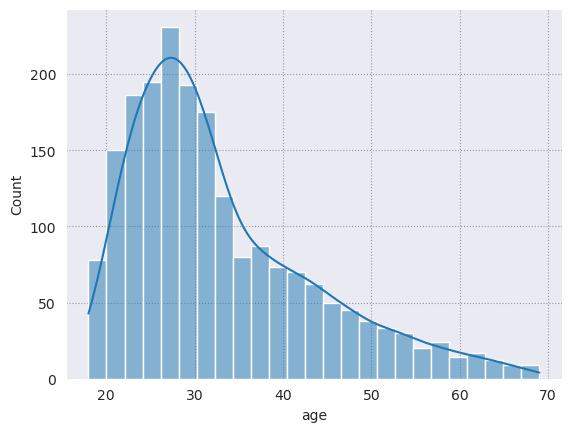

In [13]:
sns.histplot(tinder_df["age"],kde=True)
# distribution of age

*The age column has a long tail which shows it's deviation from normal distribution.however,we can also plot the piechart of the distribution of the age* 

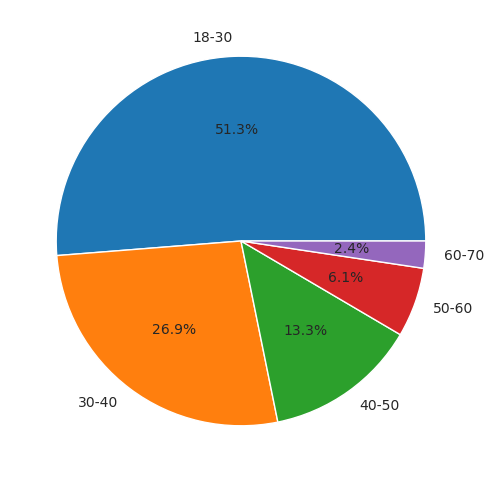

In [14]:
# Set the size of the figure to 10 inches wide by 8 inches tall
plt.figure(figsize=(6,6))

# Divide the data into categories
bins = [18,30,40,50,60,70]

# Use the `cut` function to assign each data point to a category
categories = pd.cut(tinder_df["age"], bins, \
            labels=["18-30", "30-40", "40-50","50-60","60-70"])

# Count the number of data points in each category
counts = categories.value_counts()

# Plot the data as a pie chart
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

*Almost 50% of the people who are using tinder are between the age of 18-30*

<Axes: xlabel='height', ylabel='Count'>

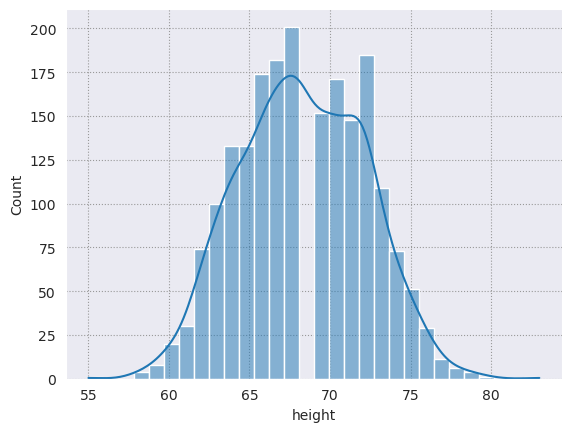

In [15]:
sns.histplot(tinder_df["height"],kde=True)

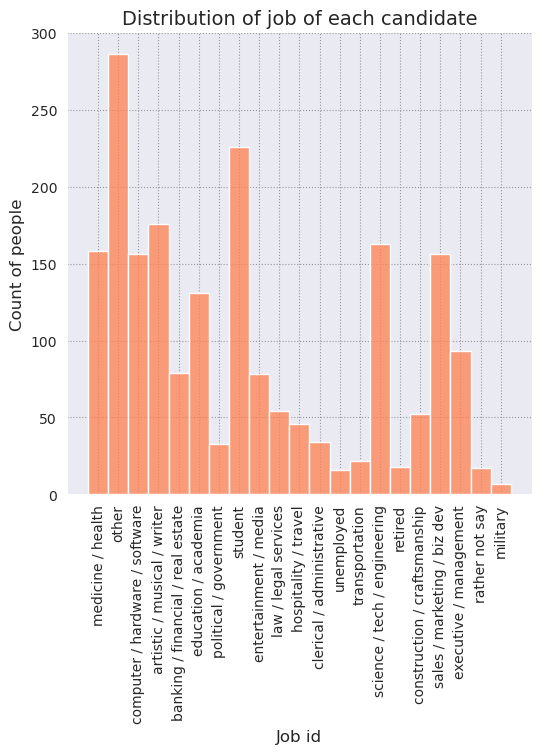

In [16]:
plt.figure(figsize=(6, 6))
sns.histplot(x="job" ,data=tinder_df, color="coral")

# rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.title("Distribution of job of each candidate",\
                         fontsize=14)

plt.xlabel("Job id", fontsize=12)
plt.ylabel("Count of people", fontsize=12)

plt.show()

## Data Manipulation

*The numerical data column age has a lomng right tail so basicall right skewed column hence we should apply log transformation to make it a normal distribution*

### Handling age 

In [17]:
# apply log transformation 
#to decrease skewness of the column 
tinder_df["age"] = tinder_df["age"].\
             apply(lambda x :np.log(x))

*Since in our dataset a large number of columns are categorical,But we can not encode all the variable using same technique so we will divide the categorical column into three different categories one which have only 2
unique value , second which have unique value between 2 to 6 and third which have unique value grater than 6*

### Handling language categorical data 

In [18]:
tinder_df['language'].str.contains('english').unique()

array([ True])

*Since there are 571 unique rows in the langauge column, but every row has english as column language. it will create a very saprse matrix if we do one-hot encoding of language column so we will create another column which counts the number of unique language person knows and we drop language column*

In [19]:
# count the number of languages in each row
tinder_df['num_languages'] = tinder_df['language']\
                              .str.count(',') + 1
tinder_df.drop(["language"],axis=1,inplace=True)

### Handling location preference categorical data 

*to encode location preference we will assign number to each location preferred place like for anywhere giving lowest preference to 1 and same city having highest preference equals 1* 

In [20]:
place_type_strength = {
   'anywhere': 1.0,
   'same state': 2.0, 
   'same city': 2.5
}

tinder_df['location_preference'] = tinder_df['location_preference']\
                              .apply(lambda x: place_type_strength[x])

In [21]:
two_unique_values_column = {
    'sex': {'f': 1, 'm': 0},
    'dropped_out': {'no': 0, 'yes': 1}
}

tinder_df.replace(two_unique_values_column, inplace=True)


### Handling Status categorical column 

*we will divide all the four distinct element in two parts 1. either he is single or available and 2. is either he is married or seeing someone higher weight is given to the people who are single or available*

In [22]:
status_type_strength = {
   'single': 2.0,
   'available': 2.0, 
   'seeing someone': 1.0,
   'married':1.0
}
tinder_df['status'] = tinder_df['status']\
                              .apply(lambda x: status_type_strength[x])

### Handling orientation column

*Since orientation is an important element of the dataframe and it is an Nominal Categorical Data. so here we will do one hot encoding of this column*

In [23]:
# perform one hot encoding
orientation_one_hot = pd.get_dummies(tinder_df['orientation'])

# add the new columns to the original DataFrame
tinder_df = pd.concat([tinder_df, orientation_one_hot], axis=1)

In [24]:
#Drop the existing orientation column 
tinder_df.drop("orientation",axis=1,inplace=True)

### Handling drink and drugs categorical data

In [25]:
tinder_df["drinks"].unique()

array(['socially', 'often', 'rarely', 'very often', 'not at all',
       'desperately'], dtype=object)

In [26]:
drinking_habbit = {
   'socially': 'sometimes',
   'rarely': 'sometimes', 
   'not at all': 'do not drink',
   'often':'drinks often',
   'very often':'drinks often',
   'desperately':'drinks often'
}
tinder_df['drinks'] = tinder_df['drinks']\
                              .apply(lambda x: drinking_habbit[x])

In [27]:
# perform one hot encoding
habbit_one_hot = pd.get_dummies(tinder_df[['drinks','drugs']])

# add the new columns to the original DataFrame
tinder_df = pd.concat([tinder_df, habbit_one_hot], axis=1)

In [28]:
#Drop the existing drink and drugs column 
tinder_df.drop(["drinks","drugs"],axis=1,inplace=True)

### Handling location categorical data 

In [29]:
region_dict = {'southern_california': ['los angeles', 'san diego',\
                                'hacienda heights', 'north hollywood', 'phoenix'],
               'new_york': ['brooklyn', 'new york']}
               
def get_region(city):
    for region, cities in region_dict.items():
        if city.lower() in [c.lower() for c in cities]:
            return region
    return "northern_california"

tinder_df['location'] = tinder_df['location'].str.split(', ').str[0].apply(get_region)

In [30]:
# perform one hot encoding
location_one_hot = pd.get_dummies(tinder_df['location'])

# add the new columns to the original DataFrame
tinder_df = pd.concat([tinder_df, location_one_hot], axis=1)

In [31]:
#Drop the existing location column 
tinder_df.drop(["location"],axis=1,inplace=True)

### Handling job column 

In [32]:
# create a new DataFrame with one-hot encoded job column
job_dummies = pd.get_dummies(tinder_df["job"], prefix="job")

# concatenate the new DataFrame with the original DataFrame
tinder_df = pd.concat([tinder_df, job_dummies], axis=1)

# drop the original job column
tinder_df.drop("job", axis=1, inplace=True)

### Handling smoke and pets column 

In [33]:
smokes = {
   'no': 1.0,
   'sometimes': 0, 
   'yes': 0,
   'when drinking':0,
   'trying to quit':0
}
tinder_df['smokes'] = tinder_df['smokes']\
                              .apply(lambda x: smokes[x])

In [34]:
import category_encoders as ce
# create an instance of BinaryEncoder
bin_enc = ce.BinaryEncoder(cols=['pets'])

# fit and transform the pet column
pet_enc = bin_enc.fit_transform(tinder_df['pets'])

# add the encoded columns to the original dataframe
tinder_df = pd.concat([tinder_df, pet_enc], axis=1)

tinder_df.drop("pets",axis=1,inplace = True)

### Handling new_language and body_profile column 

In [35]:
# create a new DataFrame with one-hot encoded job column
new_languages_dummies = pd.get_dummies(tinder_df["new_languages"], prefix="language")

# concatenate the new DataFrame with the original DataFrame
tinder_df = pd.concat([tinder_df, new_languages_dummies], axis=1)

# drop the original job column
tinder_df.drop("new_languages", axis=1, inplace=True)

In [36]:
# create a new DataFrame with one-hot encoded job column
body_profile_dummies = pd.get_dummies(tinder_df["body_profile"], prefix="profile")

# concatenate the new DataFrame with the original DataFrame
tinder_df = pd.concat([tinder_df, body_profile_dummies], axis=1)

# drop the original job column
tinder_df.drop("body_profile", axis=1, inplace=True)

In [37]:
mapping = {
    'sports': 'fitness',
    'painting': 'art',
    'instruments': 'music',
    'sketching': 'art',
    'craft': 'art',
    'video games': 'gaming',
    'photography': 'art',
    'designing': 'art',
    'dancing': 'music',
    'writting': 'literature',
    'singing': 'music',
    'food': 'culinary',
    'makeup': 'fashion',
    'astronomy': 'science',
    'organising events': 'event planning',
    'music': 'music',
    'reading': 'literature',
    'politics': 'politics',
    'studying': 'education',
    'diy': 'craft',
    'yoga': 'fitness',
    'travelling': 'travel',
    'gardening': 'outdoor activities',
    'social_networking': 'technology',
    'movies': 'entertainment',
    'collectibles': 'hobbies',
    'acting': 'entertainment',
    'cooking': 'culinary',
    'calligraphy': 'art',
    'fishing': 'outdoor activities',
    'camping': 'outdoor activities'
}
tinder_df['interests'] = tinder_df['interests'].replace(mapping)

In [38]:
# create a new DataFrame with one-hot encoded job column
interest_dummies = pd.get_dummies(tinder_df["interests"])

# concatenate the new DataFrame with the original DataFrame
tinder_df = pd.concat([tinder_df, interest_dummies], axis=1)

# drop the original interest column
tinder_df.drop("interests", axis=1, inplace=True)

In [39]:
tinder_df.head()

,username,age,status,sex,height,smokes,education_level,dropped_out,bio,other_interests,...,fitness,gaming,hobbies,literature,music,outdoor activities,politics,science,technology,travel
0,Edith Lopez,3.295837,2.0,1,66.0,1.0,4.0,0,bottom line i love life! i work hard and i lov...,instruments,...,1,0,0,0,0,0,0,0,0,0
1,Travis Young,3.258097,2.0,0,68.0,1.0,3.0,0,"i'm a straightforward, genuine, fun loving (i'...",instruments,...,0,0,0,0,0,0,0,0,0,0
2,Agnes Smith,2.995732,1.0,1,69.0,0.0,2.0,0,mmmmm yummy tacosss. yoga is where it's at. i ...,dancing,...,0,0,0,0,1,0,0,0,0,0
3,Salvador Klaver,3.295837,2.0,0,68.0,1.0,3.0,0,i'm a stealth geek. that special mix of techni...,acting,...,0,0,0,0,0,0,0,0,0,0
4,Elana Sewell,3.091042,2.0,1,68.0,0.0,2.0,1,with the whisper of the wind i was weaved into...,designing,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# create a mapping between interests and categories
interests_mapping = {
    'sports': 'fitness',
    'painting': 'arts and crafts',
    'instruments': 'arts and crafts',
    'sketching': 'arts and crafts',
    'craft': 'arts and crafts',
    'video games': 'technology',
    'photography': 'photography',
    'designing': 'arts and crafts',
    'dancing': 'arts and crafts',
    'writting': 'education',
    'singing': 'arts and crafts',
    'food': 'food',
    'makeup': 'arts and crafts',
    'astronomy': 'education',
    'organising events': 'event planning',
    'music': 'music',
    'reading': 'education',
    'politics': 'arts and crafts',
    'studying': 'education',
    'diy': 'arts and crafts',
    'yoga': 'fitness',
    'travelling': 'fitness',
    'gardening': 'outdoor activities',
    'social_networking': 'outdoor activities',
    'movies': 'movies',
    'collectibles': 'technology',
    'acting': 'arts and crafts',
    'cooking': 'arts and crafts',
    'calligraphy': 'arts and crafts',
    'fishing': 'outdoor activities',
    'camping': 'fitness'
}

# replace the interests with their corresponding categories
tinder_df['other_interests'] = tinder_df['other_interests'].replace(interests_mapping)

In [41]:
# create a new DataFrame with one-hot encoded job column
other_interest_dummies = pd.get_dummies(tinder_df["other_interests"])

# concatenate the new DataFrame with the original DataFrame
tinder_df = pd.concat([tinder_df, other_interest_dummies], axis=1)

# drop the original other_interest interest column
tinder_df.drop("other_interests", axis=1, inplace=True)

## Data Modelling

In [42]:
# Initialize TfidfVectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = tfidf.fit_transform(tinder_df['bio'])

# Get the feature names from the TfidfVectorizer object
feature_names = tfidf.vocabulary_

# Convert tfidf matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Create a cosine similarity matrix based on all available features
features = tinder_df.drop("bio", axis=1).columns.tolist()
for feature in features:
    tfidf_matrix = pd.concat([tfidf_df, tinder_df[feature]], axis=1)
cosine_sim = cosine_similarity(tfidf_matrix)

# Define a function to recommend users based on a given username
def recommend(username, num_recommendations=5):
    # Get the index of the user with the given username
    idx = tinder_df[tinder_df['username'] == username].index[0]

    # Get the cosine similarity scores for the user with the given username
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the users by their similarity scores in descending order
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of the top num_recommendations similar users
    sim_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    # Return the usernames of the recommended users
    return tinder_df['username'].iloc[sim_indices]


*The model will show best k profiles for every username also here k is a hyperparameter*

In [43]:
#k=5
recommend('Alissa Wilbur',5)


1301       Carl Ramirez
1          Travis Young
1283    Tanner Grantham
247        Eric Nollman
1685       Thomas Moran
Name: username, dtype: object